In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [174]:
df=pd.read_csv("C:/Users/ujwal/Downloads/l.heigth.csv")

In [175]:
df.head()

Height(Inches)  Weight(Pounds)
0              45             120
1              58             135
2              48             123
3              60             145
4              70             160

In [176]:
df.tail()

Height(Inches)  Weight(Pounds)
18              76             150
19              87             167
20              45             129
21              56             140
22              72             161

In [177]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [178]:
df.describe()

Height(Inches)  Weight(Pounds)
count       23.000000       23.000000
mean        73.826087      158.434783
std         17.872407       19.516487
min         45.000000      120.000000
25%         59.000000      142.500000
50%         78.000000      162.000000
75%         86.000000      175.000000
max        105.000000      183.000000

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Height(Inches)  23 non-null     int64
 1   Weight(Pounds)  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


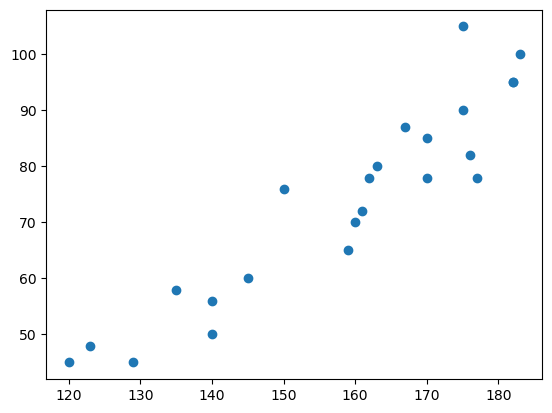

In [180]:
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel=('Weight(Pounds)')
plt.ylabel=('Height(Inches)')

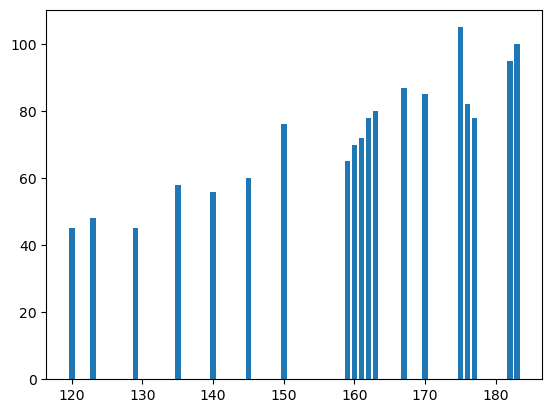

In [181]:
plt.bar(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel=("Weight(Pounds)")
plt.ylabel=("Height(Inches)")

In [182]:
""" checking the correlation """
df.corr()

Height(Inches)  Weight(Pounds)
Height(Inches)        1.000000        0.930672
Weight(Pounds)        0.930672        1.000000

In [183]:
import seaborn as sns
sns.pairplot(df)

In [184]:
""" Independent and dependent features. independent features should be data frame or 2 dimensional array """
x=df[["Weight(Pounds)"]]
y = df["Height(Inches)"]
 ## this variable can be in series or 1d-array


In [185]:
x.shape

(23, 1)

In [186]:
""" in terms of array format -2d array """
x=df[["Weight(Pounds)"]]
np.array(x).shape

(23, 1)

In [187]:
""" in terms of array format -1d array"""
x_series=df["Weight(Pounds)"]
np.array(x_series).shape


(23,)

In [188]:
x

Weight(Pounds)
0              120
1              135
2              123
3              145
4              160
5              162
6              163
7              175
8              182
9              170
10             176
11             182
12             175
13             183
14             170
15             177
16             140
17             159
18             150
19             167
20             129
21             140
22             161

In [189]:
np.array(y).shape

(23,)

In [190]:
""" train test split"""
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [191]:
x_train.shape

(17, 1)

In [192]:
x_test.shape

(6, 1)

In [193]:
from sklearn.preprocessing import StandardScaler

# Scale both features and target
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train_scaled = x_scaler.fit_transform(x_train)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

regression.fit(x_train_scaled, y_train_scaled)

# Predict and reverse the scaling
y_pred_scaled = regression.predict(x_scaler.transform(x_test))
y_pred = y_scaler.inverse_transform(y_pred_scaled)


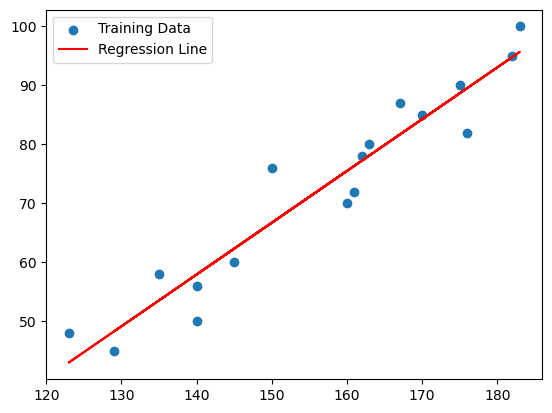

In [194]:
plt.scatter(x_train, y_train, label="Training Data")
plt.plot(x_train, y_scaler.inverse_transform(regression.predict(x_scaler.transform(x_train))), color="red", label="Regression Line")
plt.legend()


In [195]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}, MAE: {mae}, MSE: {mse}")


R²: 0.747534313374423, MAE: 8.240575734376769, MSE: 95.74059871701047


In [196]:
import  statsmodels.api as sm

In [197]:
model=sm.OLS(y_train,x_train).fit()

In [198]:
predection=model.predict(x_test)
print(predection)

15    82.909526
9     79.630619
0     56.209848
8     85.251603
17    74.478049
12    81.972696
dtype: float64


In [199]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1130.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                    2.85e-16
Time:                        16:46:26   Log-Likelihood:                         -61.059
No. Observations:                  17   AIC:                                      124.1
Df Residuals:                      16   BIC:                                      125.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

c:\Users\ujwal\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [220]:
predicted_height = scaler.inverse_transform(regression.predict(scaler.transform([[74]])))
predicted_height_in_cm = predicted_height * 2.54
print(predicted_height_in_cm)



[[193.51208263]]


c:\Users\ujwal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
